In [1]:
using LTspice, Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
example2 = LTspiceSimulation("example2.asc",tempdir=true)

LTspiceSimulation:
circuit path = C:\Users\Chris\AppData\Local\Temp\jl_380A.tmp\example2.asc

Parameters
vin                       = 4.0
iout                      = 1.0
rset                      = 40200.0

Measurements
pin                      
pout                     


In [3]:
vin_list = linspace(6.0,20.0,10)
iout_list = linspace(0.5,3.0,4)
rfb(vout)= 0.6*60.4e3/(vout-0.6)
function compute_efficiency_array(vin_list, iout_list, vout)
    efficiency = Array{Float64}((length(vin_list),length(iout_list)))
    for vin_index in eachindex(vin_list)
        for iout_index in eachindex(iout_list)
            (pin,pout) = example2(vin_list[vin_index],iout_list[iout_index],rfb(vout))
            efficiency[vin_index,iout_index] = -pout/pin
        end
    end
    return efficiency
end
@time efficiency = compute_efficiency_array(vin_list, iout_list, 3.3)

365.839638 seconds (646.71 k allocations: 28.749 MB, 0.00% gc time)


10×4 Array{Float64,2}:
 0.954564  0.949387  0.934709  0.943968
 0.948306  0.945432  0.932891  0.929945
 0.920137  0.930952  0.921298  0.918075
 0.905396  0.92108   0.914132  0.90905 
 0.894335  0.914676  0.910477  0.899532
 0.881928  0.907999  0.906262  0.896397
 0.868859  0.901094  0.902248  0.893534
 0.858308  0.893953  0.897292  0.891087
 0.846548  0.887443  0.892595  0.886912
 0.829991  0.880189  0.88715   0.884452


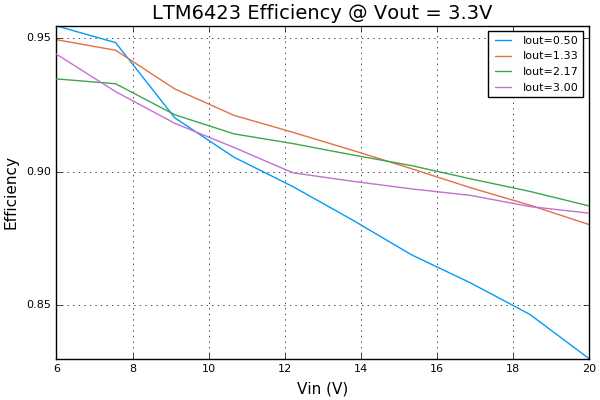

In [4]:
plt = plot()
for iout_index in eachindex(iout_list)
    plot!(plt,vin_list,efficiency[:,iout_index],label = "Iout="*@sprintf("%2.2f",iout_list[iout_index]))
end
plot!(plt, title = "LTM6423 Efficiency @ Vout = 3.3V")
plot!(plt, xlabel = "Vin (V)", ylabel = "Efficiency")